In [1]:
include("Tools.jl");
include("GaugeFixing.jl")
include("KrylovTechnical.jl")

res = deserialize("newton/rotate=true_10_0.0001_1.0e-10__newton_result.data");

A_init = res["A_init"]
A = res["A"]

py"""

def get_scaldims(A):
    logging.info("Diagonalizing the transfer matrix.")
    # The cost of this scales as O(chi^6).
    transmat = ncon((A, A), [[3,-101,4,-1], [4,-102,3,-2]])
    es = transmat.eig([0,1], [2,3], hermitian=False)[0]
    # Extract the scaling dimensions from the eigenvalues of the
    # transfer matrix.
    es = es.to_ndarray()
    es = np.abs(es)
    es = -np.sort(-es)
    es[es==0] += 1e-16  # Ugly workaround for taking the log of zero.
    log_es = np.log(es)
    log_es -= np.max(log_es)
    log_es /= -np.pi
    return log_es

"""

2024-03-15 22:08:36 I: Diagonalizing the transfer matrix.
2024-03-15 22:08:36 I: Diagonalizing the transfer matrix.


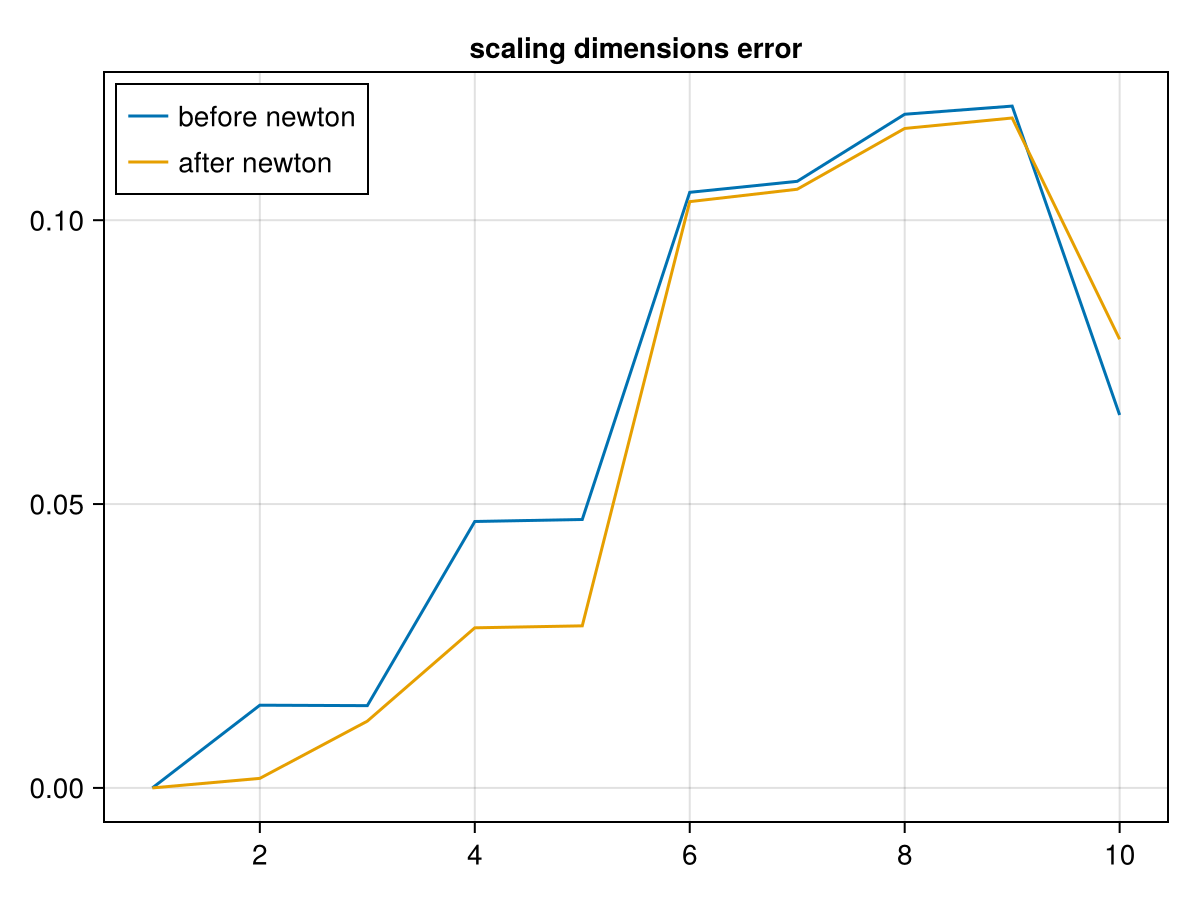

In [10]:

fig = Figure()
ax = Axis(fig[1, 1],
    title="scaling dimensions error"
)

lines!(ax, (exact_spectrum(10) - py"get_scaldims"(A_init)[1:10]) .|> abs, label="before newton")
lines!(ax, (exact_spectrum(10) - py"get_scaldims"(A)[1:10]) .|> abs, label="after newton")
axislegend(ax; position=:lt)
fig